# 1. 문제정의
- 버섯의 특징을 활용해 독 / 식용 버섯 분류
- Decision Tree 시각화 & 과대적합 제어
- 툭성에 대한 중요도 확인

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 분류 Tree
from sklearn.tree import DecisionTreeClassifier
# 회귀 Tree
from sklearn.tree import DecisionTreeRegressor

# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier

# 회귀 KNN
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import numpy as np
# 교차검증을 위한 라이브러리
from sklearn.model_selection import cross_val_score

In [2]:
mush = pd.read_csv('mushroom.csv')
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. 데이터 수집 

In [3]:
mush = pd.read_csv('mushroom.csv')
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. 데이터 전처리
- info : 결측치, 데이터 타입 확인
- describe : 이상치 확인
- 이상치를 확인할 땐 데이터가 수치형 데이터이어야 함

In [4]:
mush['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [5]:
# 결측치 파악
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# 이상치 파악
# count : 데이터 개수
# unique : 중복을 제거한 데이터 개수
# top : 가장 많은 비율을 차지하는 데이터 개수
# freq :  top의 실제 데이터
mush.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
X = mush.loc[ : , 'cap-shape' : ]
y = mush.loc[ : , 'poisonous']

In [8]:
X = mush.iloc[ : , 1: ]
y = mush.iloc[ : , 0] # series
# y = mush.iloc[ : ,  :1] # DataFrame

In [9]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [10]:
# one-hot encoding (원 핫 인코딩)
# get_dummies
X_onehot = pd.get_dummies(X)

In [11]:
X[X.columns[0]].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [12]:
sum1 = 0
for i in X.columns:
    sum1+=len(X[i].unique())
print(sum1)

117


In [13]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X_onehot, # 문제데이터
                                                   y, # 정답데이터
                                                   test_size=0.3, # 정답 비율
                                                   random_state=3 # 섞는 방법
                                                   )

In [14]:
# Label
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [15]:
habitat_dic = {
        'u' : 1, # u를 1로 바꾸겠다.
        'g' : 2,
        'm' : 3,
        'd' : 4,
        'p' : 5,
        'w' : 6,
        'l' : 7
}
a= X['habitat'].map(habitat_dic).value_counts()

In [16]:
a

4    3148
2    2148
5    1144
7     832
1     368
3     292
6     192
Name: habitat, dtype: int64

# 4. EDA(탐색적 데이터 분석) 

<BarContainer object of 7 artists>

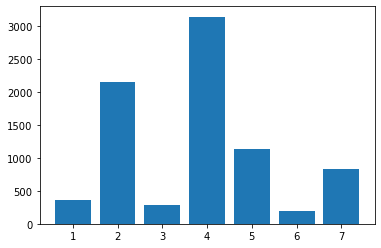

In [17]:
plt.bar(a.index, a)

<BarContainer object of 7 artists>

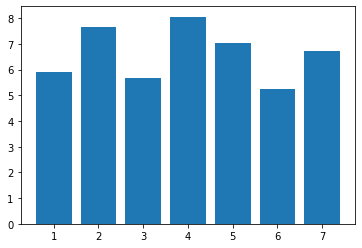

In [18]:
plt.bar(a.index, np.log(a))

# 5. 모델 선택 및 하이퍼파라미터 튜닝

In [50]:
tree = DecisionTreeClassifier(max_depth = 2)

In [51]:
# 교차검증
# 사용한 모델, 훈련용 문제(X_train), 훈련용 정답(y_train), 몇 겹으로 교차 검증을 할 건지
# cv = 5 이기 때문에 5개의 값이 나옴 = 5겹 교차검증
# 5개의 값이 모두 다듦 -> 교차검증을 진행할 때마다 train과 test의 데이터가 변함
# 5개의 값을 평균내서 test score를 예측해 볼 수 있음
# 최적의 파라미터를 찾을 수 있음
cross_val_score(tree, X_train, y_train, cv = 5).mean()

0.9532180853941477

In [56]:
tree1 = DecisionTreeClassifier(max_depth = 1)
cross_val_score(tree1, X_train, y_train, cv = 5).mean()

0.8863860280422227

In [58]:
tree2 = DecisionTreeClassifier(max_depth = 3)
cross_val_score(tree2, X_train, y_train, cv = 5).mean()

0.9857546065942966

# 5.1

# 6.1

# 7.1

In [20]:
tree2 = DecisionTreeClassifier(max_depth = 3)
tree2.fit(X_train, y_train)
# format을 써서 보기 쉽게 표현할 수도 있다.
print(f'tarin score : {tree2.score(X_train,y_train)}')
print('train score : {}'.format(tree2.score(X_train, y_train)))

tarin score : 0.9857544846992613
train score : 0.9857544846992613


In [23]:
# 배운대로 해도 잘 나온다.
print('train score : ',tree2.score(X_train, y_train))

train score :  0.9857544846992613


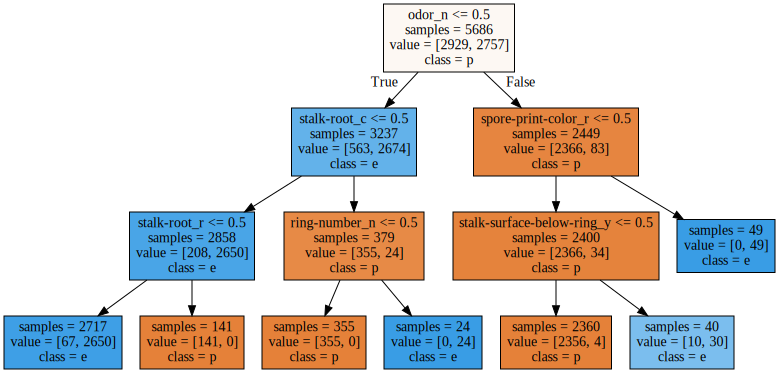

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

# 6. 학습

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

# 7. 평가 

In [27]:
print('train score', tree.score(X_train, y_train))
print('test score', tree.score(X_test, y_test))

train score 1.0
test score 1.0


In [28]:
# tree 모델의 특성 중요도 확인하기
fi = tree.feature_importances_
fi

array([0.00000000e+00, 1.40467380e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38784363e-03, 2.29503788e-02, 0.00000000e+00,
       0.00000000e+00, 2.30627489e-02, 0.00000000e+00, 6.16063447e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.92150180e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.75846481e-01, 0.00000000e+00, 8.97862256e-02,
      

In [29]:
# None에 원하는 숫자 적으면 그만큼만 출력
# 모든 행 출력
pd.set_option('display.max_rows', None)
# 모든 열 출력
pd.set_option('display.max_columns', None)

In [30]:
# 보기 좋게 만들기
# pd.DataFrame(fi, index = X_onehot.columns).sort_values(by = 0, ascending=False)
# 특성 중요도는 0 ~ 1사이의 숫자로 이루어짐
# 117개 컬럼의 특성 중요도 총합은 1
importance_df = pd.DataFrame(fi, index = X_onehot.columns)
importance_df.sort_values(by = 0, ascending = False)

,0
odor_n,0.616063
stalk-root_c,0.175846
stalk-root_r,0.089786
spore-print-color_r,0.032861
odor_l,0.023063
odor_a,0.022950
stalk-color-below-ring_w,0.015829
stalk-surface-below-ring_y,0.015508
ring-type_e,0.005281
cap-shape_c,0.001405


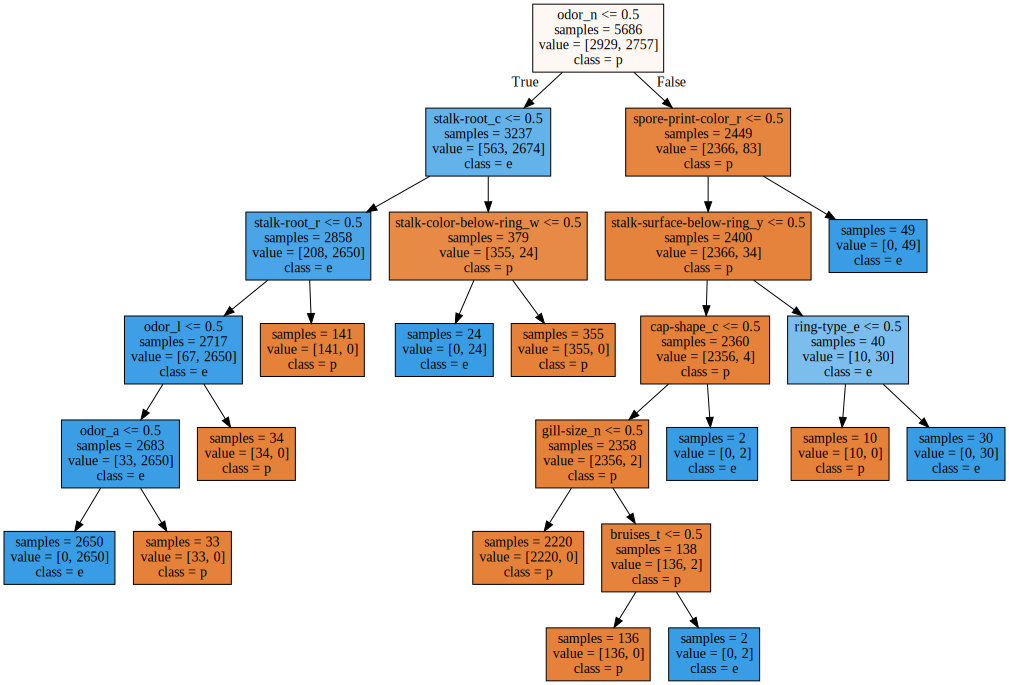

In [31]:
# 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
!pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [32]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0